### 🚗미국 Mercedes-Benz 가격 회귀 예측

#### Features

- Name: 모델명
- Mileage: 주행거리(마일리지)
- Rating: 자동차 딜러의 평균 별점
- Review Count: 자동차 딜러의 리뷰 수

#### Target

- Price: 가격

#### 1. 데이터 탐색 및 전처리

- 데이터를 읽어옵니다.

In [2]:
import pandas as pd

b_df = pd.read_csv('./datasets/benz_price.csv')
b_df

,Name,Mileage,Rating,Review Count,Price
0,2021 Mercedes-Benz A-Class A 220 4MATIC,"29,636 mi.",3.9,"1,800","$30,900"
1,2022 Mercedes-Benz AMG SL 63 Base,"5,540 mi.",4.7,"1,239","$139,999"
2,2022 Mercedes-Benz AMG SL 63 Base,"4,890 mi.",4.7,"1,239","$132,999"
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,"29,746 mi.",4.8,752,"$58,587"
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,"32,631 mi.",5.0,"1,502","$95,990"
...,...,...,...,...,...
2424,2021 Mercedes-Benz E-Class E 450 4MATIC,"54,422 mi.",NaN,236,"$53,490"
2425,2022 Mercedes-Benz S-Class 4MATIC,"11,395 mi.",4.5,"1,334","$89,599"
2426,2021 Mercedes-Benz GLB 250 Base 4MATIC,"30,392 mi.",4.9,"2,375","$32,890"
2427,2023 Mercedes-Benz E-Class E 450 4MATIC,"3,413 mi.",4.8,"1,758","$53,983"


- info()를 통해 데이터를 확인해봅니다.

In [3]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2429 non-null   object 
 1   Mileage       2429 non-null   object 
 2   Rating        2135 non-null   float64
 3   Review Count  2398 non-null   object 
 4   Price         2429 non-null   object 
dtypes: float64(1), object(4)
memory usage: 95.0+ KB


- 중복행을 확인합니다.

In [4]:
b_df.duplicated().sum()

32

- 중복행을 제거합니다.

In [5]:
b_df.drop_duplicates(inplace=True)
b_df.duplicated().sum()

0

- 결측치를 확인합니다.

In [6]:
b_df.isna().sum()

Name              0
Mileage           0
Rating          292
Review Count     31
Price             0
dtype: int64

- Rating feature의 결측치를 대체하기 위해 4분위 분포표를 확인해봅니다.

In [7]:
b_df.Rating.describe().T

count    2105.000000
mean        4.534109
std         0.385226
min         2.100000
25%         4.400000
50%         4.600000
75%         4.800000
max         5.000000
Name: Rating, dtype: float64

- 평균값으로 대체합니다.

In [9]:
b_df.Rating = b_df.Rating.fillna(b_df.Rating.mean())
b_df.isna().sum()

Name             0
Mileage          0
Rating           0
Review Count    31
Price            0
dtype: int64

- Review Count의 결측치는 0으로 대체합니다.

In [10]:
b_df['Review Count'] = b_df['Review Count'].fillna(0)
b_df.isna().sum()

Name            0
Mileage         0
Rating          0
Review Count    0
Price           0
dtype: int64

In [11]:
b_df

,Name,Mileage,Rating,Review Count,Price
0,2021 Mercedes-Benz A-Class A 220 4MATIC,"29,636 mi.",3.900000,"1,800","$30,900"
1,2022 Mercedes-Benz AMG SL 63 Base,"5,540 mi.",4.700000,"1,239","$139,999"
2,2022 Mercedes-Benz AMG SL 63 Base,"4,890 mi.",4.700000,"1,239","$132,999"
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,"29,746 mi.",4.800000,752,"$58,587"
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,"32,631 mi.",5.000000,"1,502","$95,990"
...,...,...,...,...,...
2424,2021 Mercedes-Benz E-Class E 450 4MATIC,"54,422 mi.",4.534109,236,"$53,490"
2425,2022 Mercedes-Benz S-Class 4MATIC,"11,395 mi.",4.500000,"1,334","$89,599"
2426,2021 Mercedes-Benz GLB 250 Base 4MATIC,"30,392 mi.",4.900000,"2,375","$32,890"
2427,2023 Mercedes-Benz E-Class E 450 4MATIC,"3,413 mi.",4.800000,"1,758","$53,983"


- 회귀 학습에 불필요한 feature인 Name feature를 삭제합니다.

In [12]:
pre_b_df = b_df.drop(labels=['Name'], axis=1)
pre_b_df

,Mileage,Rating,Review Count,Price
0,"29,636 mi.",3.900000,"1,800","$30,900"
1,"5,540 mi.",4.700000,"1,239","$139,999"
2,"4,890 mi.",4.700000,"1,239","$132,999"
3,"29,746 mi.",4.800000,752,"$58,587"
4,"32,631 mi.",5.000000,"1,502","$95,990"
...,...,...,...,...
2424,"54,422 mi.",4.534109,236,"$53,490"
2425,"11,395 mi.",4.500000,"1,334","$89,599"
2426,"30,392 mi.",4.900000,"2,375","$32,890"
2427,"3,413 mi.",4.800000,"1,758","$53,983"


- 현재 feature와 target의 자료형이 object이므로, 수치형 데이터로 변환해줍니다.

In [13]:
pre_b_df['Mileage'] = pre_b_df['Mileage'].apply(lambda x: int(''.join(x.split()[0].split(','))))
pre_b_df

,Mileage,Rating,Review Count,Price
0,29636,3.900000,"1,800","$30,900"
1,5540,4.700000,"1,239","$139,999"
2,4890,4.700000,"1,239","$132,999"
3,29746,4.800000,752,"$58,587"
4,32631,5.000000,"1,502","$95,990"
...,...,...,...,...
2424,54422,4.534109,236,"$53,490"
2425,11395,4.500000,"1,334","$89,599"
2426,30392,4.900000,"2,375","$32,890"
2427,3413,4.800000,"1,758","$53,983"


In [14]:
pre_b_df['Rating'].dtype

dtype('float64')

In [22]:
def get_review_count(x):
    x = str(x)
    if ',' in x:
        x = ''.join(x.split(','))
    return int(x)

In [23]:
pre_b_df['Review Count'] = pre_b_df['Review Count'].apply(get_review_count)
pre_b_df

,Mileage,Rating,Review Count,Price
0,29636,3.900000,1800,"$30,900"
1,5540,4.700000,1239,"$139,999"
2,4890,4.700000,1239,"$132,999"
3,29746,4.800000,752,"$58,587"
4,32631,5.000000,1502,"$95,990"
...,...,...,...,...
2424,54422,4.534109,236,"$53,490"
2425,11395,4.500000,1334,"$89,599"
2426,30392,4.900000,2375,"$32,890"
2427,3413,4.800000,1758,"$53,983"


In [25]:
pre_b_df['Price'].value_counts()

Price
$41,990    9
$43,777    7
$48,000    7
$49,995    6
$29,999    6
          ..
$83,982    1
$47,203    1
$57,441    1
$34,537    1
$46,035    1
Name: count, Length: 1941, dtype: int64

In [26]:
def get_price(x):
    if '$' not in x:
        return 0
    return int(''.join(x[1:].split(',')))

In [27]:
pre_b_df['Price'] = pre_b_df['Price'].apply(get_price)
pre_b_df

,Mileage,Rating,Review Count,Price
0,29636,3.900000,1800,30900
1,5540,4.700000,1239,139999
2,4890,4.700000,1239,132999
3,29746,4.800000,752,58587
4,32631,5.000000,1502,95990
...,...,...,...,...
2424,54422,4.534109,236,53490
2425,11395,4.500000,1334,89599
2426,30392,4.900000,2375,32890
2427,3413,4.800000,1758,53983


In [28]:
(pre_b_df['Price'] == 0).sum()

1

In [29]:
pre_b_df = pre_b_df[pre_b_df['Price'] != 0].reset_index(drop=True)
(pre_b_df['Price'] == 0).sum()

0

In [30]:
pre_b_df

,Mileage,Rating,Review Count,Price
0,29636,3.900000,1800,30900
1,5540,4.700000,1239,139999
2,4890,4.700000,1239,132999
3,29746,4.800000,752,58587
4,32631,5.000000,1502,95990
...,...,...,...,...
2391,54422,4.534109,236,53490
2392,11395,4.500000,1334,89599
2393,30392,4.900000,2375,32890
2394,3413,4.800000,1758,53983


- 분포를 확인해봅니다.

array([[<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Review Count'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

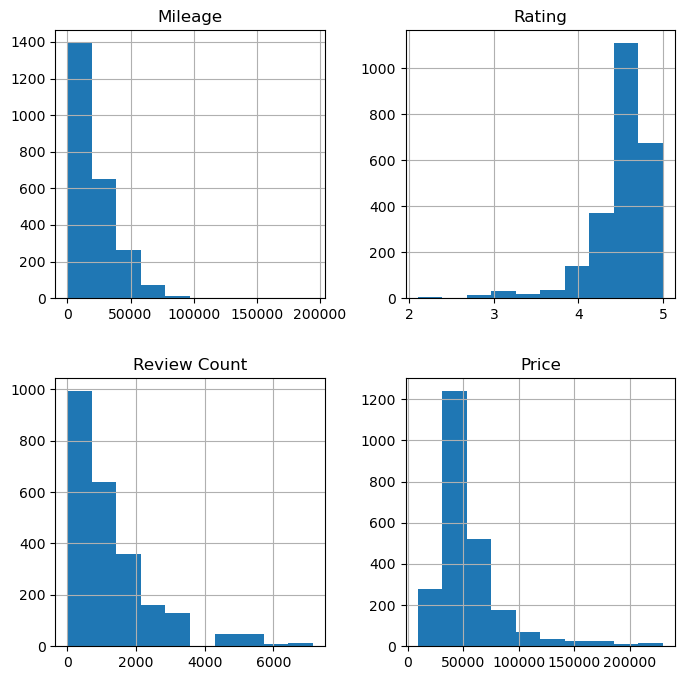

In [31]:
pre_b_df.hist(figsize=(8, 8))

- 종속변수와의 상관관계를 확인해봅니다.

In [32]:
pre_b_df.corr()['Price'].sort_values(ascending=False)[1:]

Review Count    0.042243
Rating         -0.005237
Mileage        -0.275375
Name: Price, dtype: float64

#### 2. OLS, VIF 확인

- OLS와 VIF를 확인해봅니다.

In [33]:
from statsmodels.api import OLS

features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.774
Method:                 Least Squares   F-statistic:                              2740.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:42:48   Log-Likelihood:                         -28126.
No. Observations:                2396   AIC:                                  5.626e+04
Df Residuals:                    2393   BIC:                                  5.628e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [35]:
get_vif(features)

,vif_score,feature
0,2.272622,Mileage
1,3.358376,Rating
2,2.036683,Review Count


- Review Count의 P-value가 높지만, 다중 공선성에는 문제가 없는 상태입니다.

#### 3. 회귀 모델 학습 및 예측, 평가

- 기본적인 전처리만 수행한 상태에서 회귀 모델을 훈련시킨 후 예측 및 평가를 수행해봅니다.

In [36]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [38]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 870471869.6709, RMSE: 29503.7603, R2: 0.0736


- 트리 기반 모델로 학습해봅니다.

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 1403103134.4583, RMSE: 37458.0183, R2: -0.4933
RandomForestRegressor
MSE: 875741645.8707, RMSE: 29592.9324, R2: 0.0680
GradientBoostingRegressor
MSE: 819963156.6023, RMSE: 28634.9988, R2: 0.1274
XGBRegressor
MSE: 985177542.1517, RMSE: 31387.5380, R2: -0.0485
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 481
[LightGBM] [Info] Number of data points in the train set: 1916, number of used features: 3
[LightGBM] [Info] Start training from score 55940.767223
LGBMRegressor
MSE: 826882509.0387, RMSE: 28755.5648, R2: 0.1200
